# Assignment 16 (Neural Networks) Gas_Turbines Dataset

## Q. The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
## The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



## Attribute Information:

## The explanations of sensor measurements and their brief statistics are given below.

## Variable (Abbr.) Unit Min Max Mean
## Ambient temperature (AT) C â€“6.23 37.10 17.71
## Ambient pressure (AP) mbar 985.85 1036.56 1013.07
## Ambient humidity (AH) (%) 24.08 100.20 77.87
## Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
## Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
## Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
## Turbine after temperature (TAT) C 511.04 550.61 546.16
## Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
## Turbine energy yield (TEY) MWH 100.02 179.50 133.51
## Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
## Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
gas_turbines_df = pd.read_csv('gas_turbines.csv')

In [3]:
# Copying the dataset in new variables
gas_turbines_df1 = gas_turbines_df.copy()

In [4]:
gas_turbines_df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.15470,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.23630,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.20120,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.19230,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.24840,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.44670,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.48740,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.60430,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.39430,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.90810,82.782


In [5]:
# Checking for null values
gas_turbines_df1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
# Summary Statistics
gas_turbines_df1.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


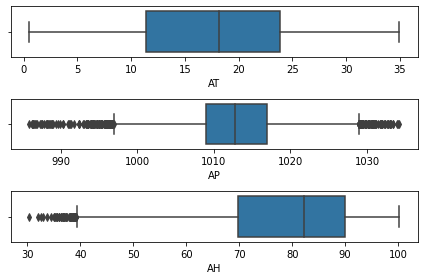

In [7]:
# Checking for Outliers on Ambient variables columns
plt.subplot(3,1,1)
ax = sns.boxplot(gas_turbines_df1['AT'])
plt.subplot(3,1,2)
ax1 = sns.boxplot(gas_turbines_df1['AP'])
plt.subplot(3,1,3)
ax2 = sns.boxplot(gas_turbines_df1['AH'])
plt.tight_layout()

## We can see that in variables 'AP' and 'AH' there are some outlier instances

In [8]:
# Adjusting the rcParams for matplotlib
plt.rcParams["figure.figsize"] = 9,5

Skewness: -0.030710466602763314
Kurtosis: -0.987597300486351


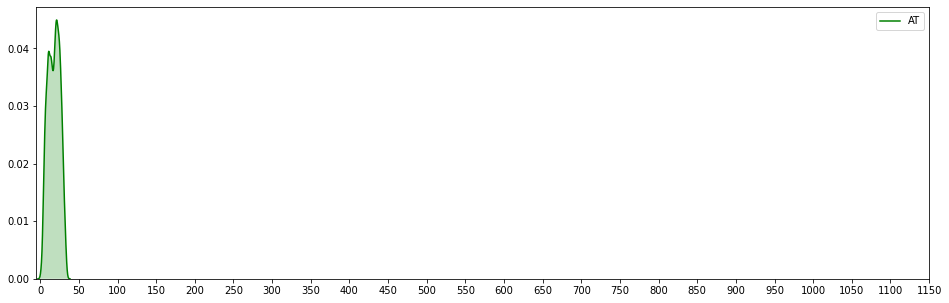

In [9]:
# Plotting the Kernel Density Estimation Plot
plt.figure(figsize=(16,5))
print("Skewness: {}".format(gas_turbines_df1['AT'].skew()))
print("Kurtosis: {}".format(gas_turbines_df1['AT'].kurtosis()))
ax = sns.kdeplot(gas_turbines_df1['AT'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Skewness: 0.10760069249939162
Kurtosis: 0.42406965727691404


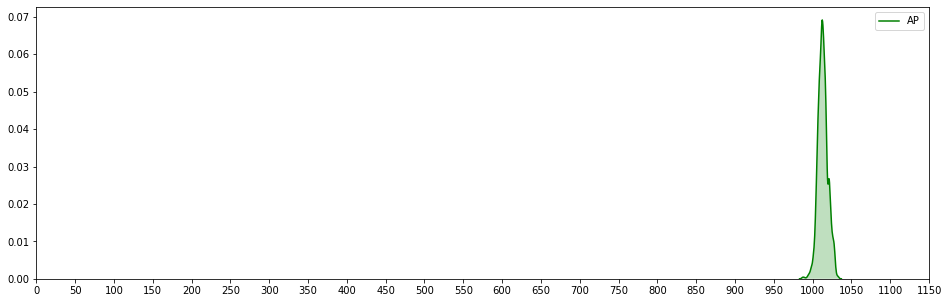

In [10]:
# Plotting the Kernel Density Estimation Plot
plt.figure(figsize=(16,5))
print("Skewness: {}".format(gas_turbines_df1['AP'].skew()))
print("Kurtosis: {}".format(gas_turbines_df1['AP'].kurtosis()))
ax = sns.kdeplot(gas_turbines_df1['AP'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

Skewness: -0.6812239660014959
Kurtosis: -0.2824761061238146


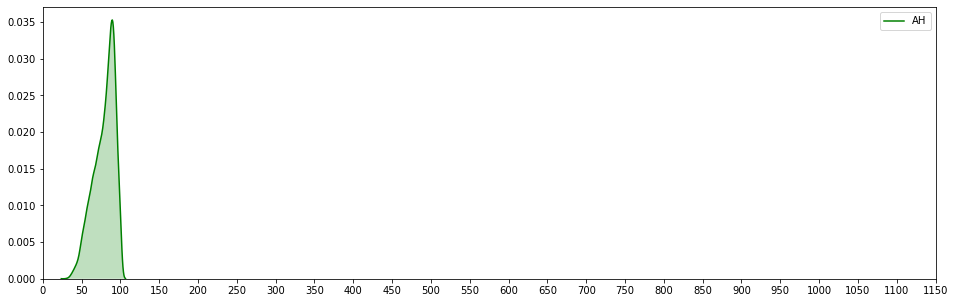

In [11]:
# Plotting the Kernel Density Estimation Plot
plt.figure(figsize=(16,5))
print("Skewness: {}".format(gas_turbines_df1['AH'].skew()))
print("Kurtosis: {}".format(gas_turbines_df1['AH'].kurtosis()))
ax = sns.kdeplot(gas_turbines_df1['AH'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

## Only AT and AH columns have negative kurtosis

## Correlation Analysis 

In [12]:
corr = gas_turbines_df1[['AT','AP','AH','TEY']].corr()

<AxesSubplot:>

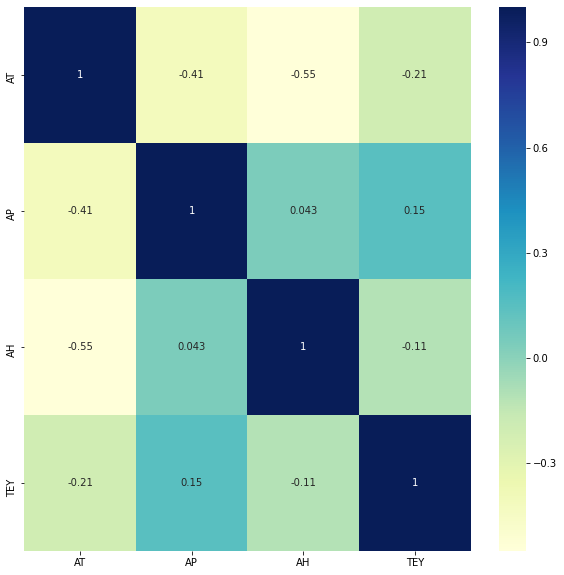

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='YlGnBu',annot=True)

## Neural Network Model 

In [14]:
gas_turbines_df2=gas_turbines_df1[['AT','AP','AH','TEY']]
x = np.array(gas_turbines_df2.iloc[:,0:3])
y = np.array(gas_turbines_df2.iloc[:,3])

<AxesSubplot:>

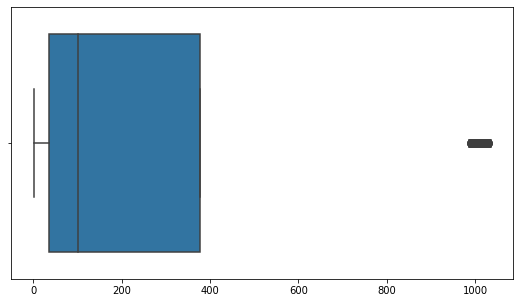

In [15]:
sns.boxplot(gas_turbines_df2)

In [16]:
gas_turbines_df2

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
5,7.6998,1010.7,92.708,114.72
6,7.7901,1011.6,91.983,114.71
7,7.7139,1012.7,91.348,114.71
8,7.7975,1013.8,90.196,114.72
9,8.0820,1015.0,88.597,131.70


In [17]:
def norm_func(i):
    x1 = (i-i.min())/(i.max()-i.min())
    return (x1)

In [18]:
x_norm = norm_func(x)

In [19]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2)

In [20]:
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [21]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [22]:
model.fit(x_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
1204/1204 [==============================] - 17s 973us/step - loss: 17944.1180
Epoch 2/150
1204/1204 [==============================] - 1s 942us/step - loss: 15058.0793
Epoch 3/150
1204/1204 [==============================] - 1s 941us/step - loss: 10404.4804
Epoch 4/150
1204/1204 [==============================] - 1s 959us/step - loss: 5801.2767
Epoch 5/150
1204/1204 [==============================] - 1s 941us/step - loss: 2475.8127
Epoch 6/150
1204/1204 [==============================] - 1s 946us/step - loss: 750.6154
Epoch 7/150
1204/1204 [==============================] - 1s 941us/step - loss: 285.1573
Epoch 8/150
1204/1204 [==============================] - 1s 960us/step - loss: 256.8291
Epoch 9/150
1204/1204 [==============================] - 1s 954us/step - loss: 257.9363
Epoch 10/150
1204/1204 [==============================] - 1s 941us/step - loss: 254.9966
Epoch 11/150
1204/1204 [==============================] - 1s 947us/step - loss: 254.9529
Epoch 12/150
1204/120

1204/1204 [==============================] - 1s 1ms/step - loss: 242.8051
Epoch 95/150
1204/1204 [==============================] - 1s 1ms/step - loss: 238.0635
Epoch 96/150
1204/1204 [==============================] - 1s 1ms/step - loss: 245.5385
Epoch 97/150
1204/1204 [==============================] - 1s 1ms/step - loss: 243.7278
Epoch 98/150
1204/1204 [==============================] - 1s 1ms/step - loss: 243.3935
Epoch 99/150
1204/1204 [==============================] - 2s 1ms/step - loss: 242.6317
Epoch 100/150
1204/1204 [==============================] - 1s 1ms/step - loss: 243.7955
Epoch 101/150
1204/1204 [==============================] - 1s 1ms/step - loss: 243.5413
Epoch 102/150
1204/1204 [==============================] - 1s 1ms/step - loss: 246.7217
Epoch 103/150
1204/1204 [==============================] - 1s 1ms/step - loss: 241.8678
Epoch 104/150
1204/1204 [==============================] - 1s 1ms/step - loss: 247.0665
Epoch 105/150
1204/1204 [==========================

In [23]:
predictions = model.predict_classes(x_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
for i in range(5):
    print('%s => %d (expected %d)' % (x[i].tolist(), predictions[i], y[i]))

[6.8594, 1007.9, 96.79899999999999] => 1 (expected 114)
[6.785, 1008.4, 97.118] => 1 (expected 114)
[6.8977, 1008.8, 95.939] => 1 (expected 114)
[7.0569, 1009.2, 95.249] => 1 (expected 114)
[7.3978, 1009.7, 95.15] => 1 (expected 114)
